# Component 1 **Plotting**

>timestamp, temperature_site1, and humidity_site1
>
>days = 2+4+1 = 7 to 11

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

> Loading and Initial Observations

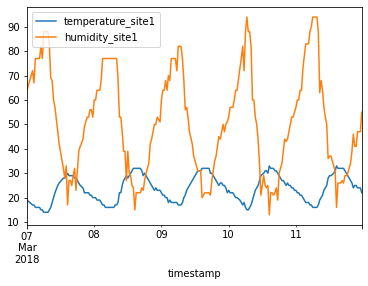

              timestamp  temperature_site1  humidity_site1        date  \
0   2018-03-07 00:00:00               19.0            64.0  2018-03-07   
1   2018-03-07 00:30:00               18.5            66.0  2018-03-07   
2   2018-03-07 01:00:00               18.0            68.0  2018-03-07   
3   2018-03-07 01:30:00               17.5            70.0  2018-03-07   
4   2018-03-07 02:00:00               17.0            72.0  2018-03-07   
..                  ...                ...             ...         ...   
235 2018-03-11 21:30:00               25.0            41.0  2018-03-11   
236 2018-03-11 22:00:00               24.0            47.0  2018-03-11   
237 2018-03-11 22:30:00               24.0            47.0  2018-03-11   
238 2018-03-11 23:00:00               24.0            47.0  2018-03-11   
239 2018-03-11 23:30:00               22.0            55.0  2018-03-11   

         time  day  
0    00:00:00    7  
1    00:30:00    7  
2    01:00:00    7  
3    01:30:00    7  
4    0

In [3]:
df = pd.read_csv(
    "weather_data_2sites-1.csv",
    parse_dates=["timestamp"],
    infer_datetime_format="%yyyy-%m-%dd %H:%M:%S",
).drop(columns=["temperature_site2", "humidity_site2", "Unnamed: 0"])
start_date = "2018-03-07 00:00:00"
end_date = "2018-03-12 00:00:00"
df = df[(df["timestamp"] >= start_date) & (df["timestamp"] < end_date)]
df["date"] = df["timestamp"].dt.date
df["time"] = df["timestamp"].dt.time
df["day"] = df["timestamp"].dt.day
df.reset_index(inplace=True, drop=True)
df.plot(x="timestamp", y=["temperature_site1", "humidity_site1"])
plt.show()
print(df)

## Line Plots
> Preprocessing the data for plotting

In [4]:
k = df[["temperature_site1", "humidity_site1", "date", "time"]]
# k = k.melt(id_vars=['time','temperature_site1','humidity_site1'],value_vars=['date']).set_index([ 'value','time']).unstack('value')
k.set_index(["date", "time"], inplace=True, drop=True)
k = k.unstack("date")
k.head()

temperature_site1                                              \
date            2018-03-07 2018-03-08 2018-03-09 2018-03-10 2018-03-11   
time                                                                     
00:00:00              19.0       20.0       22.0       23.0       23.0   
00:30:00              18.5       20.0       21.0       22.0       22.0   
01:00:00              18.0       19.0       21.0       22.0       22.0   
01:30:00              17.5       19.0       20.0       22.0       21.0   
02:00:00              17.0       19.0       20.0       21.0       21.0   

         humidity_site1                                              
date         2018-03-07 2018-03-08 2018-03-09 2018-03-10 2018-03-11  
time                                                                 
00:00:00           64.0       60.0       60.0       53.0       57.0  
00:30:00           66.0       60.0       64.0       57.0       60.0  
01:00:00           68.0       64.0       64.0       57.0       60.0  
01:30:00           70.0       64.0       68.0       57.0       64.0  
02:00:00           72.0       64.0       64.0       60.0       64.0

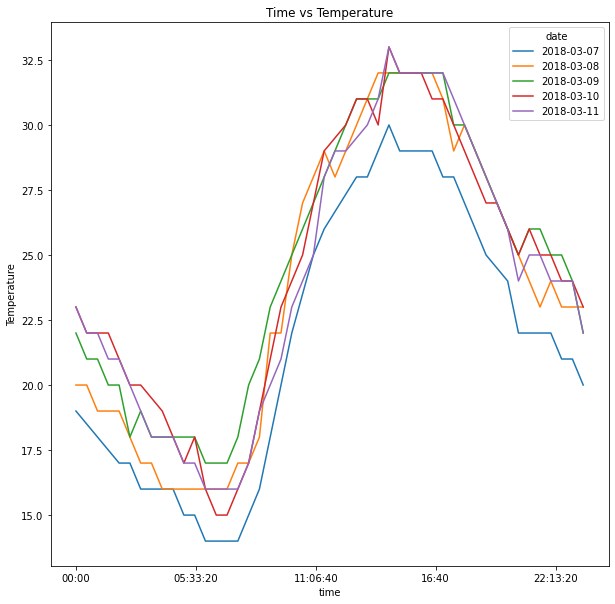

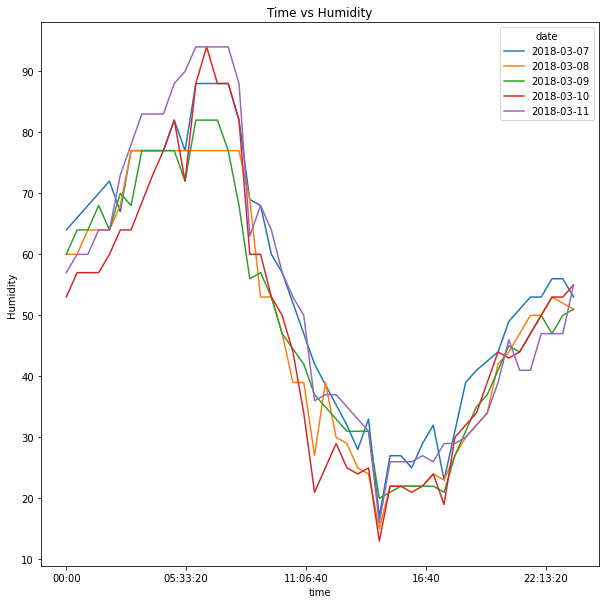

In [5]:
k["temperature_site1"].plot(
    figsize=(10, 10), ylabel="Temperature", title="Time vs Temperature"
)
k["humidity_site1"].plot(figsize=(10, 10), ylabel="Humidity", title="Time vs Humidity")
plt.show()

## Box Plots

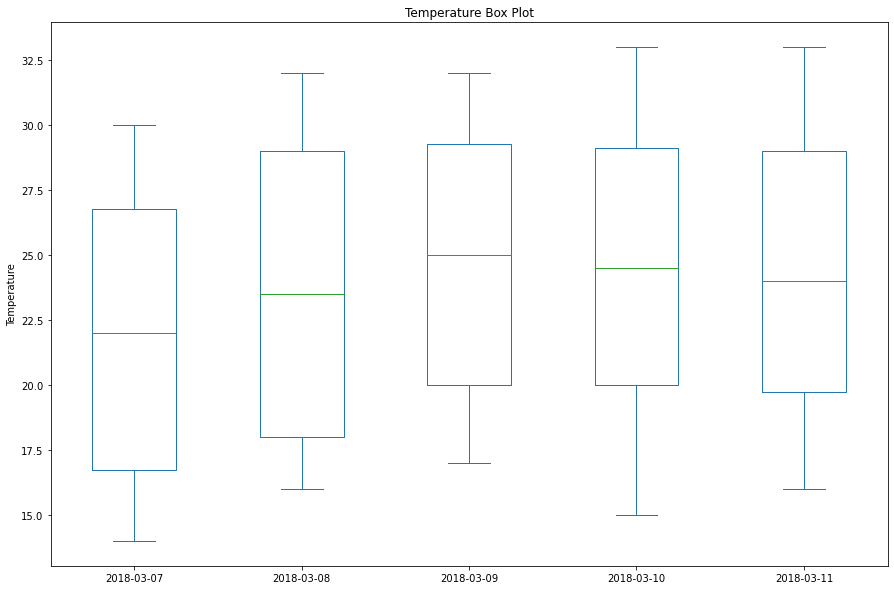

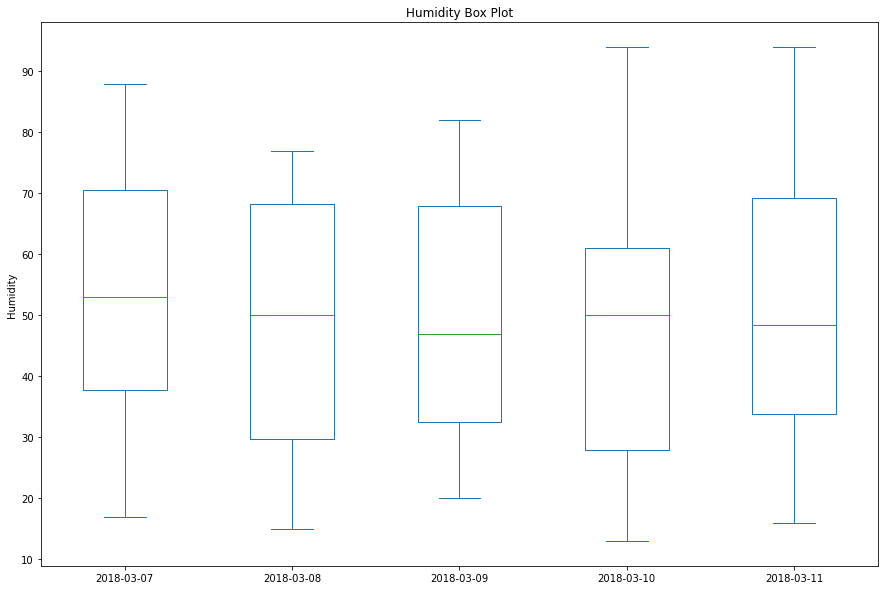

In [6]:
k.plot(
    kind="box",
    y="temperature_site1",
    figsize=(15, 10),
    title="Temperature Box Plot",
    ylabel="Temperature",
)
k.plot(
    kind="box",
    y="humidity_site1",
    figsize=(15, 10),
    title="Humidity Box Plot",
    ylabel="Humidity",
)
plt.show()

## Scatter Matrix

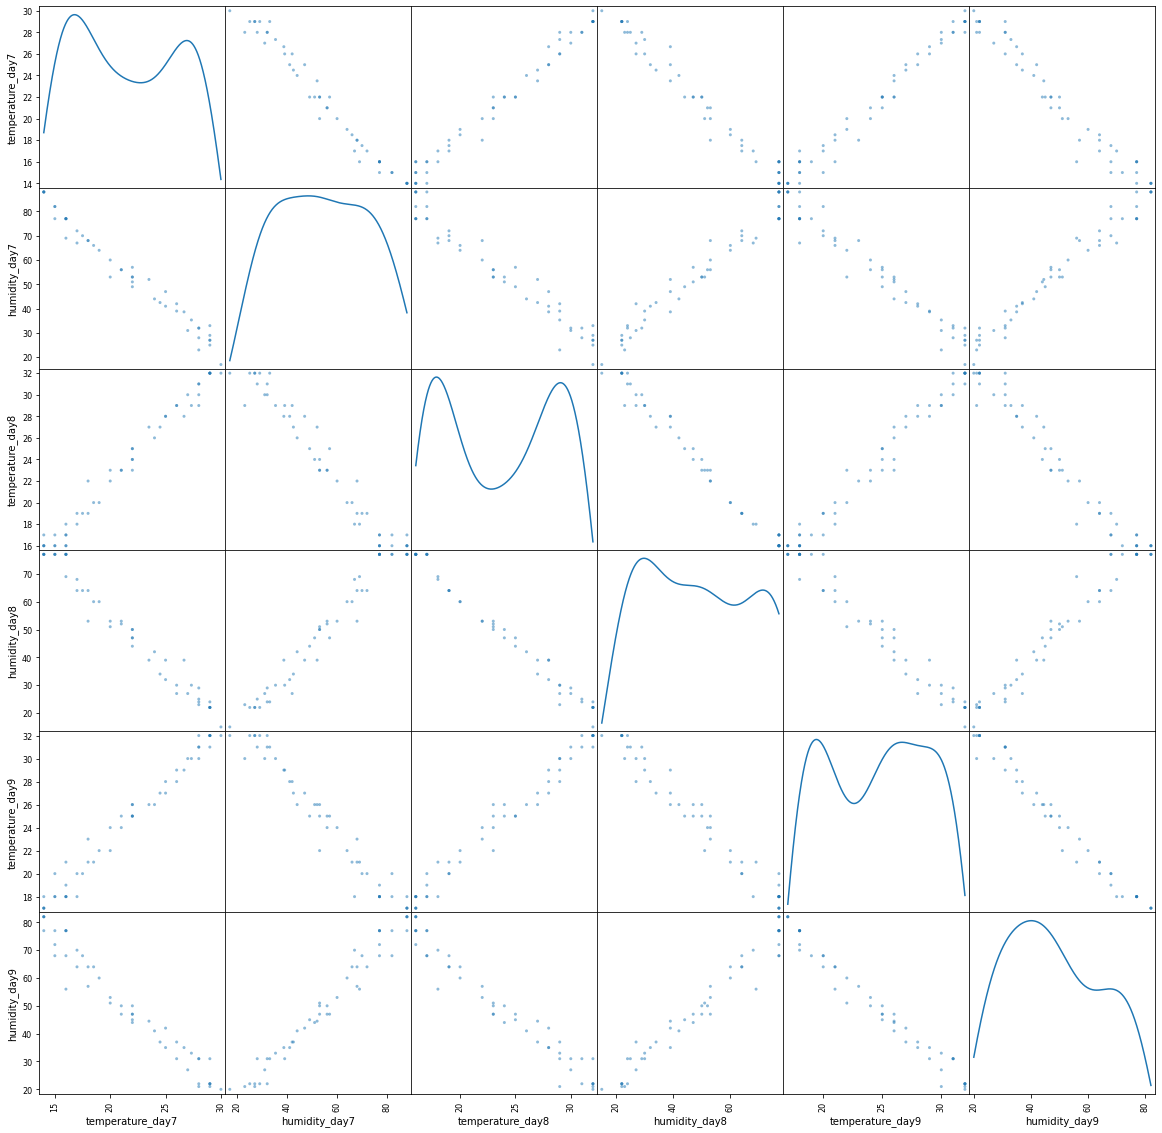

In [7]:
start_date = "2018-03-07 00:00:00"
end_date = "2018-03-10 00:00:00"
df_tmp = df[(df["timestamp"] >= start_date) & (df["timestamp"] < end_date)]

k = pd.DataFrame()
for day in df_tmp["day"].unique():
    k[f"temperature_day{day}"] = df_tmp[df_tmp["day"] == day][
        "temperature_site1"
    ].values
    k[f"humidity_day{day}"] = df_tmp[df_tmp["day"] == day]["humidity_site1"].values
pd.plotting.scatter_matrix(k, figsize=[20, 20], diagonal="kde")
plt.show()

# Component # 2: Analysis

### Loading and pre-processing the data

In [8]:
Syn_weather = pd.read_csv(
    "weather_data_2sites-1.csv",
    parse_dates=["timestamp"],
    infer_datetime_format="%yyyy-%m-%dd %H:%M:%S",
    skiprows=[1],
).drop(columns=["temperature_site2", "humidity_site2", "Unnamed: 0"])

Syn_weather["day-minutes"] = (
    Syn_weather["timestamp"].dt.hour * 60 + Syn_weather["timestamp"].dt.minute
)
Syn_weather["day-of-the-week"] = Syn_weather["timestamp"].dt.dayofweek
Syn_weather["previous-temperature"] = Syn_weather["temperature_site1"].shift()

Syn_weather.drop(columns="timestamp", inplace=True)
Syn_weather.rename(
    columns={"temperature_site1": "temperature", "humidity_site1": "humidity"},
    inplace=True,
)
Syn_weather.index = Syn_weather.index + 1

Syn_weather.loc[1, "previous-temperature"] = Syn_weather.loc[
    1, "temperature"
]  # setting the first previous-temperature value to the temperature in its row otherwise,
# it would take 'NaN' value, which will raise an error during the model training.

Syn_weather

,temperature,humidity,day-minutes,day-of-the-week,previous-temperature
1,21.0,68.0,30,3,21.0
2,20.0,73.0,60,3,21.0
3,20.0,73.0,90,3,20.0
4,20.0,73.0,120,3,20.0
5,20.0,70.0,150,3,20.0
...,...,...,...,...,...
5775,28.0,84.0,60,4,28.0
5776,28.0,84.0,90,4,28.0
5777,28.0,84.0,120,4,28.0
5778,28.0,84.0,150,4,28.0


## Regression

In [9]:
import pandas as pd  # data structure and the operations
import numpy as np  # arrays and the operations

import sklearn.linear_model as skl_lm  # for regression
from sklearn.model_selection import (
    train_test_split,
)  # splitting data into test,train sets

from sklearn.metrics import mean_squared_error  # for metrics

import matplotlib.pyplot as plt  # plotting library

import seaborn as sns  # another plotting library

In [10]:
X = Syn_weather[
    ["humidity", "day-minutes", "day-of-the-week", "previous-temperature"]
]  # Preparing the Dependent and Independent Variables
y = Syn_weather.temperature

## Linear regression

> Making test, train sets of the data and, fitting the model 

In [11]:
M1 = skl_lm.LinearRegression()  # defining a Regression model
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1 / 3, random_state=5
)  # test, train sets are split from the original data

M1.fit(X_train, y_train)  # Fitting the model to the train sets

print("Intercept :", M1.intercept_)
print("Coefficients :", M1.coef_)

Intercept : 1.9119579822386612
Coefficients : [-1.52052587e-02 -4.70626721e-04 -7.08096125e-03  9.69701851e-01]


In [12]:
m1_pred = M1.predict(X_test)
rmse = mean_squared_error(
    y_test, m1_pred, squared=False
)  # if squared is 'True' it gives MSE or else it gives RMSE
print("RMSE (M1) : %.3f" % rmse)

RMSE (M1) : 0.924


## Cross Validation 

In [13]:
from sklearn.model_selection import (
    KFold,
)  # Splitting the data into K folds used for cv (Cross Validation)
from sklearn.model_selection import cross_val_score  # For calculating the RMSE
from sklearn.model_selection import cross_val_predict  # For predictions using cv

In [14]:
X = Syn_weather[
    ["humidity", "day-minutes", "day-of-the-week", "previous-temperature"]
]  # Independent Variables
y = Syn_weather.temperature  # Dependent Variable

kfold = KFold(
    n_splits=10, random_state=5, shuffle=True
)  # 10 fold splitting of the input data

M2 = skl_lm.LinearRegression()

results = cross_val_score(
    M2, X, y, cv=kfold, scoring="neg_mean_squared_error"
)  # Calculating the RMSE of Cross Validation method
rmse = np.mean(np.sqrt(np.abs(results)))  # Converting MSE to RMSE
print("RMSE (M2) : %.3f" % rmse)

RMSE (M2) : 0.938


## Step-Wise Regression

In [15]:
import statsmodels.api as sm

In [16]:
x_columns = [
    "humidity",
    "day-minutes",
    "day-of-the-week",
    "previous-temperature",
]  # getting the regression variables
y = Syn_weather.temperature


def stepwise_reg():
    x = Syn_weather[x_columns]
    results = sm.OLS(y, x).fit()  # Fitting a OLS model on y,x
    aic = []
    if len(x_columns) != 2:  # condition, so we only get top 2 regressors
        re = results.pvalues  # Finding the p values of independent variables
        aic.append(results.aic)
        k = re[
            re == re.max()
        ].index.array  # removing the least favorable regressor ie., max p value.
        x_columns.remove(k[0])
        #         print(results.pvalues,results.aic,x_columns)
        stepwise_reg()  # looping through the regression once again.
    else:
        print(f"The top 2 regressors are : {x_columns[0]}, {x_columns[1]}")


stepwise_reg()

The top 2 regressors are : day-minutes, previous-temperature


> * Even though the Humidity has highest correlation with temperature, we see that it has less significance compared to day-minutes or previous-temperature

## Corr coeff

In [17]:
corr = Syn_weather.corr()
corr

,temperature,humidity,day-minutes,day-of-the-week,previous-temperature
temperature,1.000000,-0.702853,0.368295,-0.021720,0.988245
humidity,-0.702853,1.000000,-0.352824,0.007783,-0.691608
day-minutes,0.368295,-0.352824,1.000000,-0.000376,0.394892
day-of-the-week,-0.021720,0.007783,-0.000376,1.000000,-0.021230
previous-temperature,0.988245,-0.691608,0.394892,-0.021230,1.000000


### Correlation Matrix

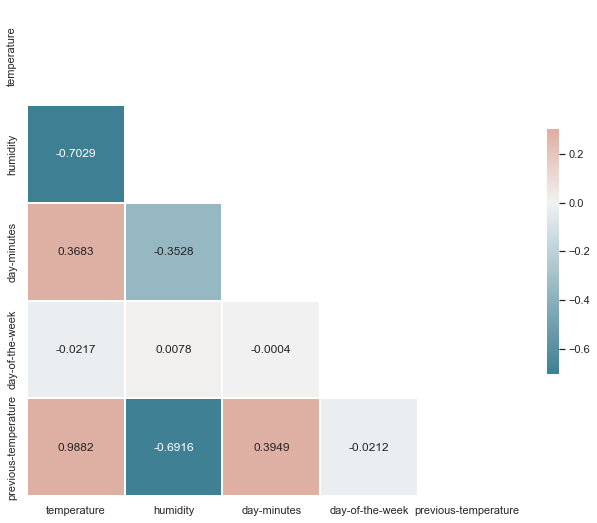

In [18]:
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 20, n=200, as_cmap=True)
sns.heatmap(
    corr,
    mask=mask,
    vmax=0.3,
    center=0,
    square=True,
    fmt=".4f",
    annot=True,
    cmap=cmap,
    linewidths=2,
    cbar_kws={"shrink": 0.5},
)
plt.show()

> * The Correlation between temperature and Humidity is very -ve. This tells that as humidity increases the temperature decreases, which is accurate.
> * The 'day-minutes' (basically tells us what time of the day) is +ve correlated to temperature. This is also accurate to the real world.
> * From the correlation plot/ matrix, it's very clear that 'day-of-the-week' has very little effect on temperature and humidity.
> * Previous temperature has a considerate effect on humidity.

## Plotting

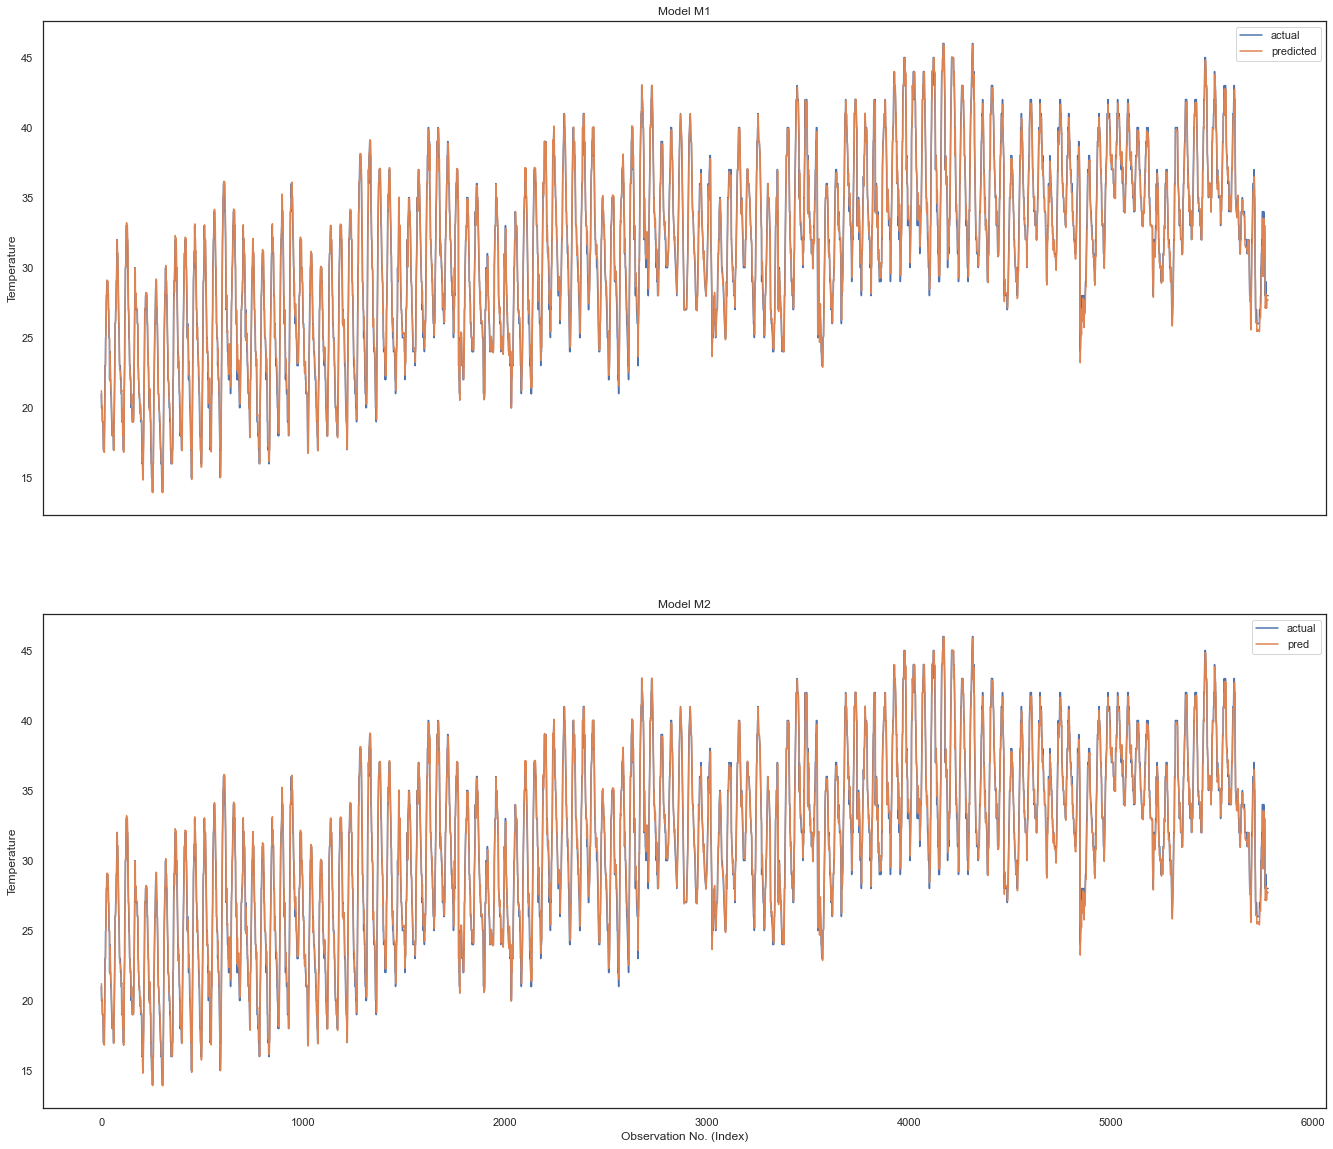

In [19]:
m1_pred = M1.predict(X)
pred_M1 = pd.DataFrame({"actual": y, "predicted": m1_pred})

m2_pred = cross_val_predict(
    M2, X, y, cv=kfold
)  # Predicting using Crosss Validation method
pred_M2 = pd.DataFrame({"actual": y, "pred": m2_pred})

fig, axes = plt.subplots(2, 1, figsize=(23, 20))

pred_M1.plot(
    ax=axes[0], subplots=False, ylabel="Temperature", sharex=True, title="Model M1"
)

pred_M2.plot(
    ax=axes[1],
    subplots=False,
    ylabel="Temperature",
    xlabel="Observation No. (Index)",
    title="Model M2",
)
plt.show()

> * Since, both M1 and M2 have an RMSE of <1, we expect a good fit of values
> * Considering the RMSE values of M1 and M2 only differ by ~0.01, we expect both the models to be very similar in performance
> * Both M1 and M2 models are very accurate and precise and this can be seen by the plots. 
> * The plots shows that, in this case the Cross Validation method has very minimal improvements over regular Linear regression with test, train split.